## 牛顿方法

In [1]:
import numpy as np

In [2]:
def df(x, delta=1e-5):
    return (f(x + delta) - f(x)) / delta

In [3]:
def ddf(x, delta=1e-5):
    return (df(x + delta) - df(x)) / delta

In [4]:
def newton_method(f, x0=1, tol=1e-10, num_epochs=200):
    x = []
    x.append(x0)
    for k in range(num_epochs):
        x.append(x[k] - df(x[k]) / ddf(x[k])) # 迭代公式
        if abs(df(x[k])) < tol:
            print("The number of iteration: {}".format(k+1))
            break
    return x[-1], x

## $y=2\pi x^2 + \frac 2 x$, 找到它在$x\in[0, +\infty)$上的最小值

In [5]:
import matplotlib.pyplot as plt

In [6]:
f = lambda x: 2 * np.pi * x**2 + 2 / x

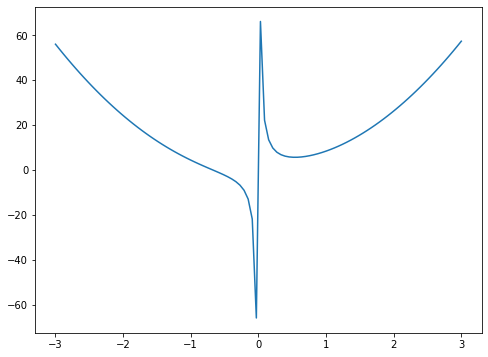

In [28]:
xn = np.linspace(-3, 3, 100)
plt.figure(figsize=(8, 6))
plt.plot(xn, f(xn))
plt.show()

In [29]:
x_min, iter_pts = newton_method(f, x0=0.1)
x_min, f(x_min)

The number of iteration: 10


(0.5419210701531552, 5.535810446403325)

In [30]:
x_min, iter_pts = newton_method(f, x0=-3)
x_min, f(x_min)

The number of iteration: 12


(0.5419210701551532, 5.535810446403324)

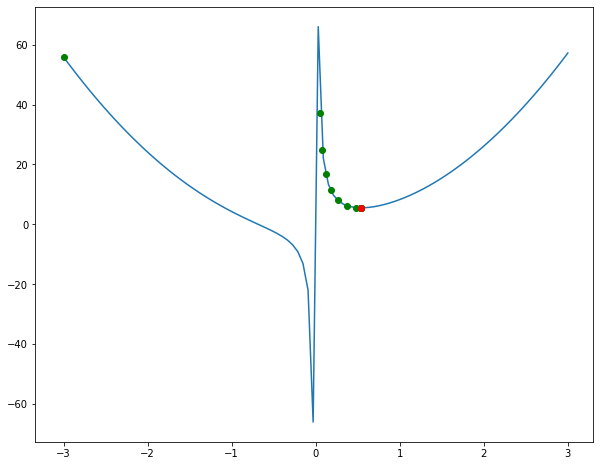

In [37]:
plt.figure(figsize=(10, 8))
plt.plot(xn, f(xn))
for p in iter_pts:
    plt.scatter(p, f(p), color='g', zorder=3)
plt.scatter(x_min, f(x_min), c='r', zorder=4)
plt.show()

### 使用 `Scipy`

In [53]:
from scipy import optimize
from autograd import grad

In [63]:
optimize.minimize(f, x0=1, method="Newton-CG", jac=grad(f))

     fun: 5.535810445932086
     jac: array([-0.00020431])
 message: 'Optimization terminated successfully.'
    nfev: 7
    nhev: 0
     nit: 5
    njev: 21
  status: 0
 success: True
       x: array([0.54192607])